## PREVENDO DOENÇAS CARDÍACAS COM TENSORFLOW


Contexto
Este conjunto de dados data de 1988 e consiste em quatro bases de dados: Cleveland, Hungria, Suíça e Long Beach V. Contém 76 atributos, incluindo o atributo previsto, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. O campo “alvo” refere-se à presença de doença cardíaca no paciente. É um número inteiro com valor 0 = sem doença e 1 = doença.
Contente
Informações do atributo:
1.	idade
2.	sexo
3.	tipo de dor no peito (4 valores)
4.	pressão arterial em repouso
5.	colesterol sérico em mg/dl
6.	açúcar no sangue em jejum > 120 mg/dl
7.	resultados eletrocardiográficos em repouso (valores 0,1,2)
8.	frequência cardíaca máxima alcançada
9.	angina induzida por exercício
10.	pico antigo = depressão do segmento ST induzida pelo exercício em relação ao repouso
11.	a inclinação do pico do segmento ST do exercício
12.	número de vasos principais (0-3) coloridos por fluorosopia
13.	tal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível
Os nomes e números de segurança social dos pacientes foram recentemente removidos do banco de dados, substituídos por valores fictícios.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
# Carregar o conjunto de dados de doenças cardíacas

heart_df = pd.read_csv('heart.csv')

print(heart_df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [ ]:
# Visualizar as primeiras linhas do conjunto de dados
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Dividir o conjunto de dados em features e labels
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Padronizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir a entrada do modelo
inputs = Input(shape=(X_train.shape[1],))

# Definir as camadas ocultas
hidden1 = Dense(32, activation='relu')(inputs)
hidden2 = Dense(16, activation='relu')(hidden1)
hidden3 = Dense(8, activation='relu')(hidden2)

In [ ]:
# Definir a camada de saída
outputs = Dense(4, activation='softmax')(hidden3)  # Softmax para classificação multiclasse

# Criar o modelo
model = Model(inputs=inputs, outputs=outputs)

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumo do modelo
model.summary()

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_8 (Dense)             (None, 32)                448       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 4)                 36        
                                                                 
Total params: 1148 (4.48 KB)
Trainable params: 1148 (4.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
21/21 [=========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


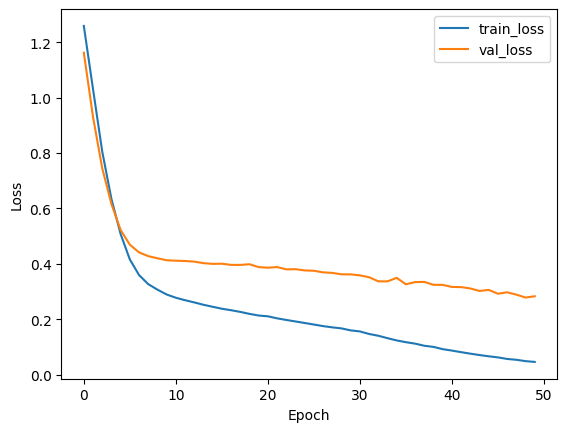

Acurácia do modelo nos dados de teste: 0.94


In [ ]:
# Exibir as métricas de treinamento
print(history.history.keys())

# Plotar a curva de aprendizado (loss) ao longo das épocas
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def print_results(y_test, y_pred):
  print('Matriz de Confusão: \n' , confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('Acuracidade: ' , accuracy_score(y_test, y_pred))

# Avaliar o modelo nos dados de teste
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Acurácia do modelo nos dados de teste: {accuracy:.2f}')

In [ ]:
# Fazer previsões nos dados de teste
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
print('Matriz de Confusão: \n' , confusion_matrix(y_test, y_pred))


7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       102
           1       0.97      0.91      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

Matriz de Confusão: 
 [[99  3]
 [ 9 94]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')